In [1]:
import cv2
import mediapipe as mp
import numpy as np
import glob
import datetime
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_selfie_segmentation = mp.solutions.selfie_segmentation


#

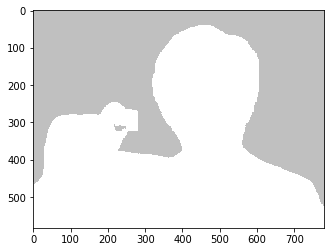

In [2]:
# For static images:
IMAGE_FILES = glob.glob("./selfie_pic/*")
BG_COLOR = (192, 192, 192) # gray
MASK_COLOR = (255, 255, 255) # white
with mp_selfie_segmentation.SelfieSegmentation(model_selection=0) as selfie_segmentation:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)

        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw selfie segmentation on the background image.
        # To improve segmentation around boundaries, consider applying a joint
        # bilateral filter to "results.segmentation_mask" with "image".
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        # Generate solid color images for showing the output selfie segmentation mask.
        fg_image = np.zeros(image.shape, dtype=np.uint8)
        fg_image[:] = MASK_COLOR
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        output_image = np.where(condition, fg_image, bg_image)

        plt.imshow(output_image)


#

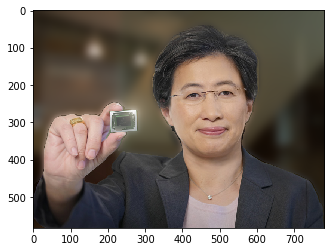

In [3]:
with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for idx, file in enumerate(IMAGE_FILES):
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    image = cv2.imread(file)
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # bg_image = np.zeros(image.shape, dtype=np.uint8)
    # bg_image[:] = BG_COLOR

    blurred_image = cv2.GaussianBlur(image, (55,55),0)
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    output_image = np.where(condition, image, blurred_image)

    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    plt.imshow(output_image)

    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR

#

In [4]:
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
#for colab
#selfie_origin="directory.mp4"
#cap = cv2.VideoCapture(selfie_origin)

cap = cv2.VideoCapture(0)
width = int(cap.get(3)) ; height = int(cap.get(4))
fps = 30.0
now = datetime.datetime.now()
vid_file_name = "./selfie_vid/{}_out.mp4".format(now.strftime("%m%d_%H%M%S"))
vid_file = cv2.VideoWriter(vid_file_name, fourcc, fps, (width, height))



#selfie_orgin = "./selfie_vid/0227_195717.mp4"
# cap = cv2.VideoCapture(selfie_orgin)

with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    bg_image = cv2.imread('./selfie_bg/milky_way.png')
    bg_image = cv2.resize(bg_image, dsize = (640, 480))
    bg_image = cv2.GaussianBlur(bg_image, (15, 15), 0)

    # bg_image = np.zeros((height, width, 3), dtype=np.uint8)
    # bg_image[:] = (192, 192, 192)

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            break

        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = selfie_segmentation.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw selfie segmentation on the background image.
        # To improve segmentation around boundaries, consider applying a joint
        # bilateral filter to "results.segmentation_mask" with "image".
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1

        output_image = np.where(condition, image, bg_image)

        cv2.imshow('MediaPipe Selfie Segmentation', output_image)

        # vid_file.write(output_image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cv2.destroyAllWindows()
cap.release()
vid_file.release()

KeyboardInterrupt: 